Descriptive Statistics for Each Variable:

Gold_Price:
  Mean: 784.9379533527697
  Median: 586.648
  Mode: 256.198
  Range: 1584.609
  Variance: 237810.7661479978
  Std Dev: 487.6584523495905
  Skewness: 0.4704245851900762
  Kurtosis: -1.3252352990392249
  1st Quartile: 351.538
  2nd Quartile (Median): 586.648
  3rd Quartile: 1247.8225

USD_Price:
  Mean: 91.17411056900875
  Median: 90.08000183
  Mode: 93.55999756
  Range: 47.41999815
  Variance: 107.3338406059899
  Std Dev: 10.36020466042973
  Skewness: 0.5472446784583619
  Kurtosis: -0.022601425881737747
  1st Quartile: 82.61000061499999
  2nd Quartile (Median): 90.08000183
  3rd Quartile: 97.439998625

GDP:
  Mean: 15639.007540935672
  Median: 16268.6255
  Mode: 10177.807
  Range: 10887.947
  Variance: 8856939.596489046
  Std Dev: 2976.0610874928366
  Skewness: -0.13872110620680314
  Kurtosis: -0.9839460638292215
  1st Quartile: 13344.7145
  2nd Quartile (Median): 16268.6255
  3rd Quartile: 17714.52725

Brent:
  Mean: 5143.956268221

<module 'matplotlib.pyplot' from 'c:\\Users\\lehoa\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

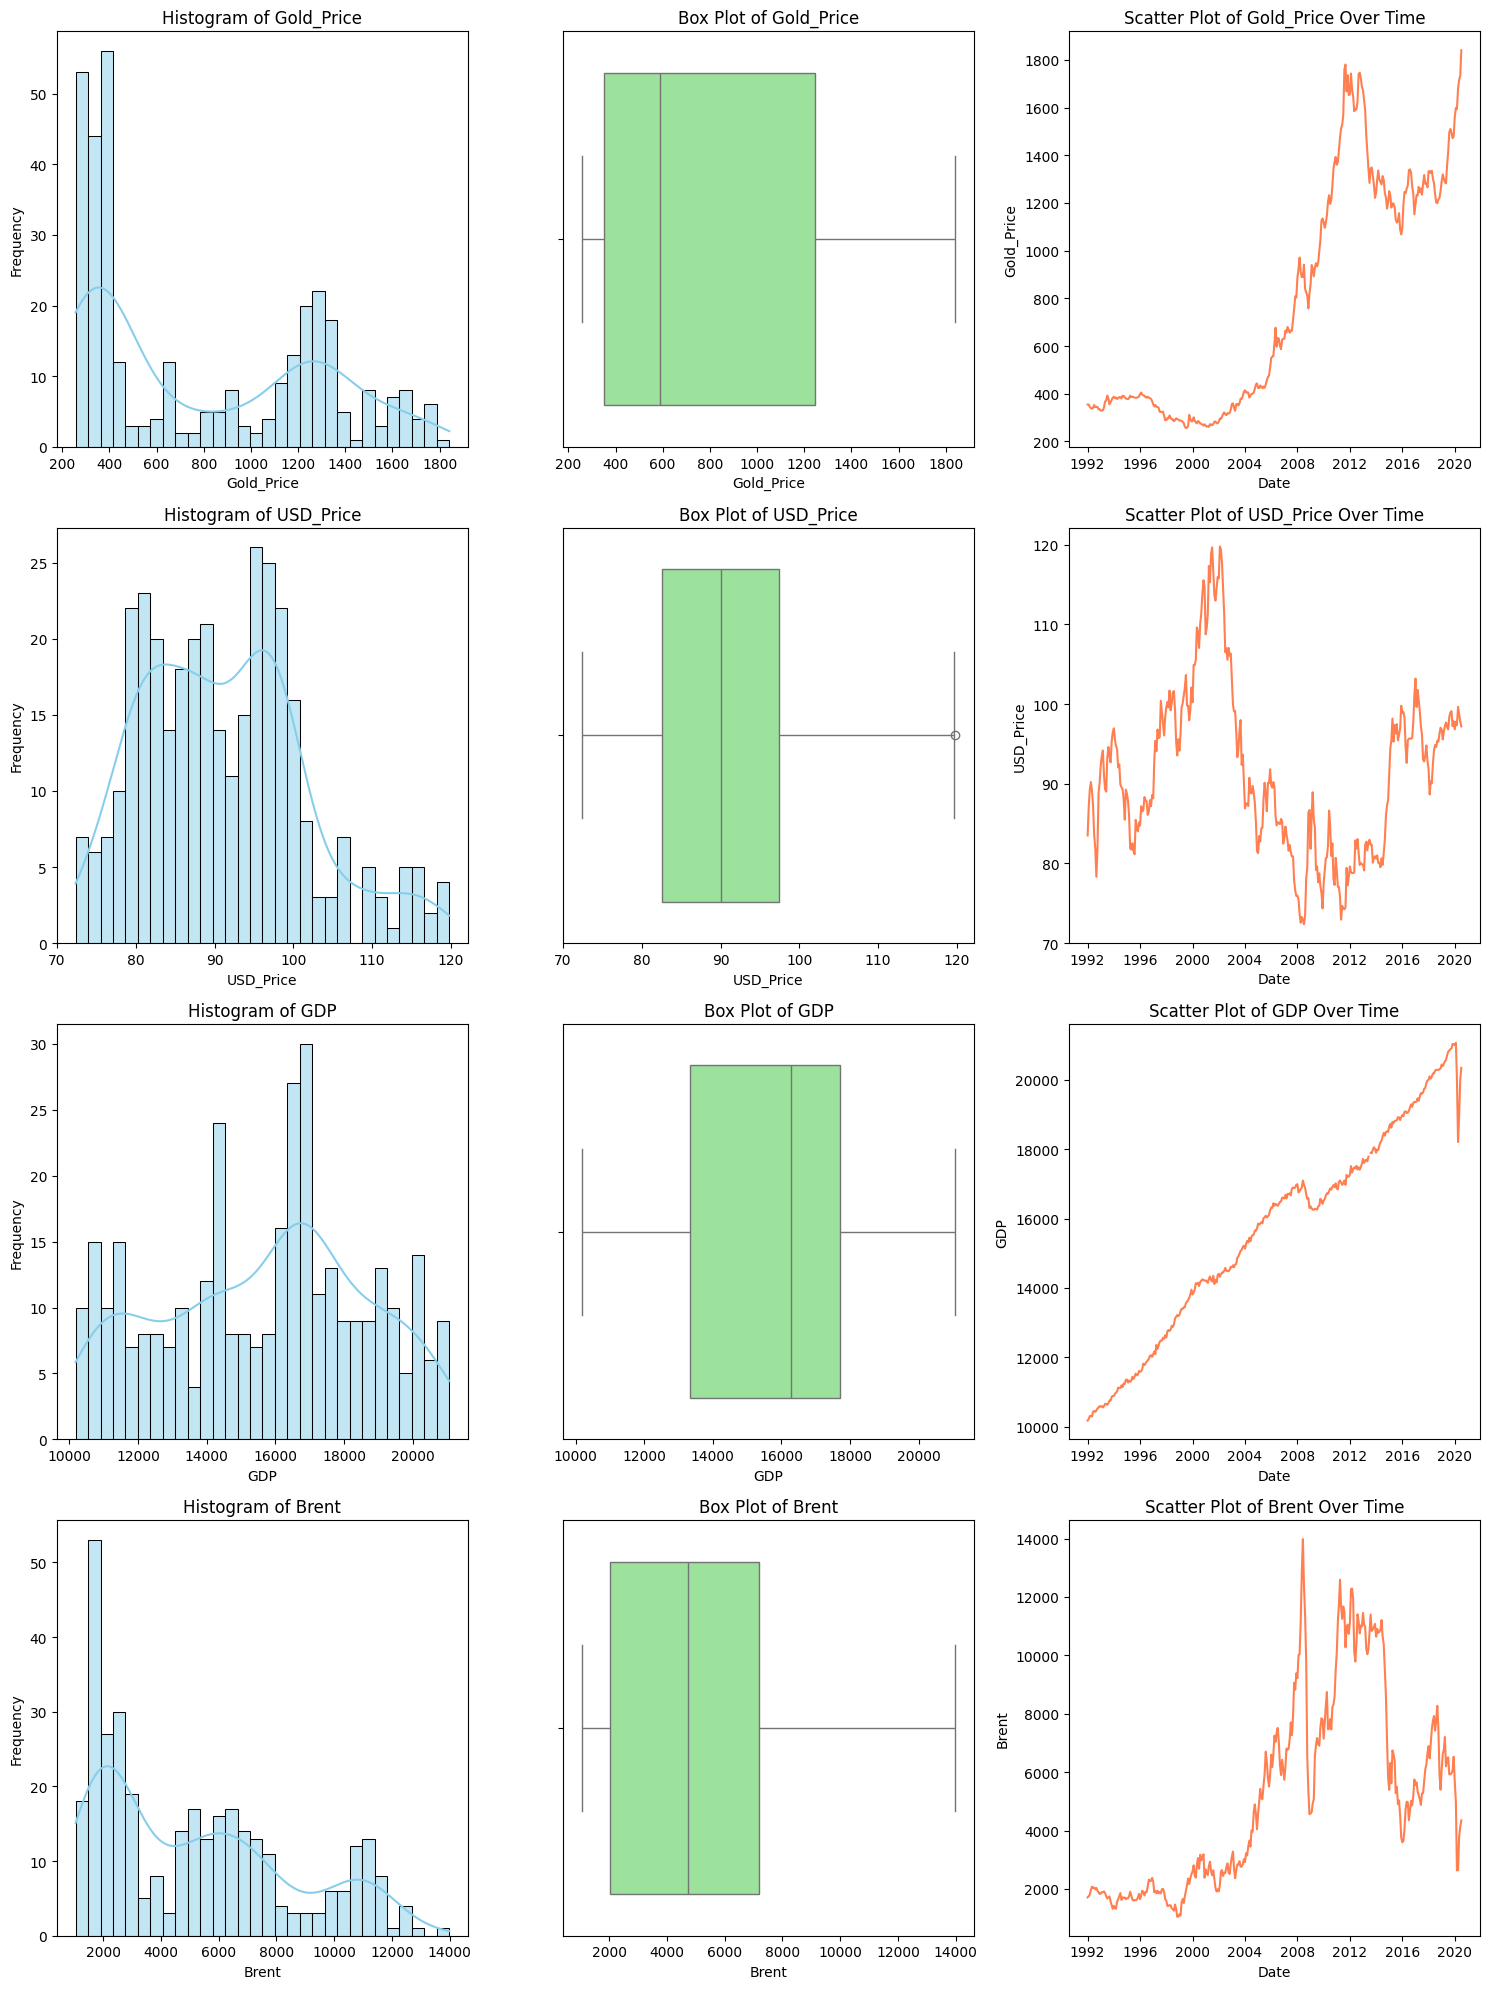

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv("Dataset.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Initialize dictionaries to store insights
descriptive_stats = {}

# Iterate through each numeric column (excluding 'Date')
for column in data.select_dtypes(include=np.number).columns:
    # Calculate descriptive statistics
    mean_val = data[column].mean()
    median_val = data[column].median()
    mode_val = data[column].mode()[0] if not data[column].mode().empty else np.nan
    range_val = data[column].max() - data[column].min()
    variance_val = data[column].var()
    std_dev_val = data[column].std()
    skewness_val = data[column].skew()
    kurtosis_val = data[column].kurtosis()
    quartiles = data[column].quantile([0.25, 0.5, 0.75]).to_dict()
    
    # Store results in dictionary
    descriptive_stats[column] = {
        'Mean': mean_val,
        'Median': median_val,
        'Mode': mode_val,
        'Range': range_val,
        'Variance': variance_val,
        'Std Dev': std_dev_val,
        'Skewness': skewness_val,
        'Kurtosis': kurtosis_val,
        '1st Quartile': quartiles[0.25],
        '2nd Quartile (Median)': quartiles[0.5],
        '3rd Quartile': quartiles[0.75]
    }

# Calculate and store covariance matrix
covariance_matrix = data.cov()

# Display descriptive statistics for each variable
print("Descriptive Statistics for Each Variable:")
for column, stats in descriptive_stats.items():
    print(f"\n{column}:")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")

print("\nCovariance Matrix:")
print(covariance_matrix)

# Visualization
num_vars = data.select_dtypes(include=np.number).columns
num_plots = len(num_vars)

# Set up the figure size
plt.figure(figsize=(15, 5 * num_plots))

for i, column in enumerate(num_vars, 1):
    # Histogram
    plt.subplot(num_plots, 3, (i - 1) * 3 + 1)
    sns.histplot(data[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(num_plots, 3, (i - 1) * 3 + 2)
    sns.boxplot(x=data[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    # Scatter plot (Date vs Variable)
    plt.subplot(num_plots, 3, (i - 1) * 3 + 3)
    plt.plot(data['Date'], data[column], color='coral')
    plt.title(f'Scatter Plot of {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)

# Adjust layout for better readability
plt.tight_layout()
plt


In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Dynamically calculate the hypothetical mean from the dataset
hypothetical_mean_gold = data['Gold_Price'].mean()

# Extract the 'Gold_Price' column
gold_prices = data['Gold_Price']

# 1. One-Sample t-test
t_statistic, p_value_ttest = stats.ttest_1samp(gold_prices, hypothetical_mean_gold)
print("One-Sample t-test for Gold Prices:")
print(f"  t-statistic: {t_statistic:.4f}, p-value: {p_value_ttest:.4f}")
if p_value_ttest < 0.05:
    print("  Result: Statistically significant (p < 0.05)")
else:
    print("  Result: Not statistically significant (p >= 0.05)")

# 2. Chi-Square Test
# Categorize gold prices into bins (Low, Medium, High)
gold_categories = pd.cut(gold_prices, bins=3, labels=['Low', 'Medium', 'High'])
observed_counts = gold_categories.value_counts()

# Hypothetical expected distribution (e.g., equal distribution)
expected_counts = [len(gold_prices) / 3] * 3
chi2_statistic, p_value_chi2 = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)
print("\nChi-Square Test for Gold Price Categories:")
print(f"  Chi-square statistic: {chi2_statistic:.4f}, p-value: {p_value_chi2:.4f}")
if p_value_chi2 < 0.05:
    print("  Result: Statistically significant (p < 0.05)")
else:
    print("  Result: Not statistically significant (p >= 0.05)")

# 3. Confidence Interval for the Mean
confidence_level = 0.95
mean_gold = gold_prices.mean()
std_dev_gold = gold_prices.std()
sample_size_gold = len(gold_prices)
std_error_gold = std_dev_gold / np.sqrt(sample_size_gold)

# Calculate confidence interval
confidence_interval = stats.t.interval(confidence_level, sample_size_gold - 1, loc=mean_gold, scale=std_error_gold)
print(f"\n{confidence_level * 100}% Confidence Interval for Mean Gold Price:")
print(f"  {confidence_interval}")

# Interpretation of Results
if p_value_ttest < 0.05:
    print("\nThe mean gold price is significantly different from the dynamically calculated hypothetical mean.")
else:
    print("\nThe mean gold price is not significantly different from the dynamically calculated hypothetical mean.")

if p_value_chi2 < 0.05:
    print("The distribution of gold prices across categories is statistically significant.")
else:
    print("The distribution of gold prices across categories is not statistically significant.")


One-Sample t-test for Gold Prices:
  t-statistic: 0.0000, p-value: 1.0000
  Result: Not statistically significant (p >= 0.05)

Chi-Square Test for Gold Price Categories:
  Chi-square statistic: 81.0496, p-value: 0.0000
  Result: Statistically significant (p < 0.05)

95.0% Confidence Interval for Mean Gold Price:
  (733.1467003625868, 836.7292063429526)

The mean gold price is not significantly different from the dynamically calculated hypothetical mean.
The distribution of gold prices across categories is statistically significant.


# Conclusion
## One-Sample t-test for Gold Prices:

  t-statistic: 0.0000, p-value: 1.0000

  Result: Not statistically significant (p >= 0.05)

## Chi-Square Test for Gold Price Categories:

  Chi-square statistic: 81.0496, p-value: 0.0000

  Result: Statistically significant (p < 0.05)

## 95.0% Confidence Interval for Mean Gold Price:

  (733.1467003625868, 836.7292063429526)

The mean gold price is not significantly different from the dynamically calculated hypothetical mean.

The distribution of gold prices across categories is statistically significant.